# Frequency Domain Variance $\sigma^2(f)$

There is a lot of confusion about variance and coherence on transfer functions (TFs).  In particular, it is unclear how exactly to draw a connection between uncertainty on a transfer function in the frequency domain and coherence on the transfer function.  This is made worse by the fact that "variance" is a term defined in the time-domain, but not the frequency domain.  Also, the number of averages in an RMS TF measurement seems like it should help reduce uncertainty, but naive inclusion of the number of averages seems to underestimate the true uncertainty of the TF.

### Transfer Function

In LIGO signal processing, control systems are monitored via several time domain signals.  For a single-input single-output system $H$, we can relate the time-domain input $x(t)$ to the time-domain output $y(t)$ via convolution in the time-domain.  Or we can take the FFT of these signals and relate them in the frequency domain via the transfer function:

$$ Y(f) = H(f) X(f) $$

where $f$ is frequency, $Y(f)$ is the FFT of the output signal, $X(f)$ is the FFT of the input signal, and $H(f)$ is the transfer function of your control system.

### Power Spectral Density

The power spectral density (PSD) of a time domain signal $x(t)$ tells us how the power of a signal is distributed over frequency.  This is useful for characterizing a continuous, stationary signal where the energy may be infinite over infinite time, but the power is finite.  By definition, the two sided PSD $S_{xx}(\omega)$ is defined as:

$$ S_{xx}(\omega) = \lim_{T \to \infty} \left\langle \left| X(\omega)\right|^2\right\rangle$$

where $X(\omega)$ is the FFT of $x(t)$, truncated to run over a time $T$:

$$ X(\omega) = \dfrac{1}{\sqrt{T}} \int_0^T x(t) e^{-i \omega t} dt $$

We can define a single-sided PSD $G_{xx}(\omega)$ on the domain $\omega \in [0, \infty)$:

$$ G_{xx}(\omega) = 2 S_{xx}(\omega) \quad \mathrm{for} \,\, \omega \in [0, \infty) $$

### Parseval's Theorem

Parseval's Theorem states that energy must be equal whether it is represented in the time domain or frequency domain:

$$ \int_{-\infty}^{\infty} \left|x(t)\right|^2 dt = \dfrac{1}{2\pi}\int_{-\infty}^{\infty} \left|X(\omega)\right|^2 d\omega $$

### Time Domain Variance $\sigma^2(t)$

The total power in a real signal $x(t)$ is its square, $x^2(t)$.  The variance $\sigma^2_x$ in a variable $x(t)$ is defined as 

$$ \mathrm{Var}[x(t)] = \sigma^2_x = \langle x^2(t)\rangle - \langle x(t)\rangle^2 $$

for zero-mean white noise, $\langle x(t)\rangle = \mu_x = 0$, giving

$$ \mathrm{Var}[x(t)] = \langle x^2(t)\rangle $$

### Sample Mean Variance
This is from Bendat and Piersol section 5.3.1 

The sample mean $\hat{\mu}_x$ is estimated by

$$ \hat{\mu}_x = \dfrac{1}{T} \displaystyle\int_0^T x(t) \,dt $$

The true mean $\mu_x$ is the expectation value of $x(t)$

$$ \mu_x = E[x(t)] $$

The variance of the sample mean $\mathrm{Var}[\hat{\mu}_x]$ is

$$ \mathrm{Var}[\hat{\mu}_x] = E[(\hat{\mu}_x - \mu_x)^2] = E[\hat{\mu}_x^2] - \mu_x^2 $$

where

$$ E[\hat{\mu}_x^2] = \dfrac{1}{T^2} \displaystyle\int_0^T \displaystyle\int_0^T E[x(\xi) x(\eta)] \,d\xi \,d\eta $$

The autocorrelation $R_x(\tau)$ for a stationary random process $x(t)$ is

$$ R_x(\tau) = E[x(t) \,x(t+\tau)] $$

The autocovariance $C_x(\tau)$ is

$$ C_x(\tau) = R_x(\tau) - \mu_x^2 $$

So the variance of the sample mean can be written

$$ \mathrm{Var}[\hat{\mu}_x] = \dfrac{1}{T^2} \displaystyle\int_0^T \displaystyle\int_0^T C_x(\eta - \xi) \,d\eta \,d\xi $$
$$ \mathrm{Var}[\hat{\mu}_x] = \dfrac{1}{T^2} \displaystyle\int_0^T \displaystyle\int_{-\xi}^{T-\xi} C_x(\tau) \,d\tau \,d\xi $$
$$ \mathrm{Var}[\hat{\mu}_x] = \dfrac{1}{T} \displaystyle\int_0^T \left(1-\dfrac{|\tau|}{T}\right) C_x(\tau) \,d\tau $$

For $T \gg |\tau|$, 

$$ \mathrm{Var}[\hat{\mu}_x] \approx \dfrac{1}{T} \displaystyle\int_{-\infty}^{\infty} C_x(\tau) \,d\tau $$

### Sample Variance Variance

### PSD Variance

### Cross Spectral Density Variance and Covariance

### Coherence

The coherence $\gamma$ between signals represents their correlation on a scale between 0 and 1:

$$ \gamma^2 = \dfrac{\left|G_{xy}(f)\right|^2}{G_{xx}(f) \, G_{yy}(f)} $$

### Transfer Function Ratio Variance

A transfer function $H(f)$ can also be defined in terms of its cross spectral density $G_{xy}(f)$ and power spectral density $G_{xx}(f)$:

$$ H(f) = \dfrac{G_{xy}(f)}{G_{xx}(f)} $$

We are concerned with the variance on the transfer function $\mathrm{Var[H(f)]}$.  In general, the variance of a ratio of random numbers is not well defined, but if they are normal distributions the ratio is described by a Cauchy distribution.

Things to think about:

1) H(f) is a complex number.  I'm sure that real and imaginary terms are Cauchy distributed, but are mag and phase?
2) For a driven TF measurement, 

## White Noise Variance

For a simple sine wave with white noise on top, we have

$$ x(t) = s(t) + n(t) $$

where $s(t) = A \sin(2 \pi f_0 t)$ and $n(t) = \mathrm{Normal}(0, \sigma^2_n)$, where $\sigma^2_n$ is the variance of the white noise.

The power in the signal: $$ P_s = \dfrac{1}{T} \int_0^T s^2(t) dt = \dfrac{A^2}{2}$$

The power in the noise: $$ P_n = \sigma^2_n$$

Signal to noise ratio: $$ SNR = \dfrac{P_s}{P_n} = \dfrac{A^2}{2 \sigma^2_n}$$

### PSD Noise Floor

From the first equation we can take the PSDs of each signal over a time $T$ with $N$ averages and get

$$ G_{xx}(f) = G_{ss}(f) + G_{nn}(f) $$

In this example I calculate $G_{xx}(f)$ using scipy.signal.welch(), then estimate $P_s$ and $P_n$ to see how close my calculated values from above are to the estimate.

We know that in this case, $G_{ss}(f)$ only has a value at $f_0$, so $$P_s = \int_0^\infty G_{ss}(f) \, \delta(f_0 -f) \, df = \dfrac{A^2}{2}$$.  

In reality there is a bit of spectral leakage into the surrounding bins, in this example I sum over the bins that are one tenth of the maximum height achieved by $G_{xx}(f)$.  This only works for high SNR signals.

Now that I know where the power in the signal lies, I can estimate $P_n$ using the rest of $G_{xx}(f) \approx G_{nn}(f)$:
$$ P_n = \int_0^\infty G_{nn}(f) df \approx \sum_{i=0}^K G_{nn}(f_i) \Delta f = \sum_{i=0}^K G_{nn}(f_i) \dfrac{N}{T} \approx G_{nn}(f) \dfrac{K \, N}{T}$$

where $\Delta f$ is the PSD bin width, $K = f_\mathrm{Nyquist} \, / \, \Delta f$, and $f_\mathrm{Nyquist} = f_\mathrm{Sampling} \, / \, 2$.  The last approximation only works for flat, white noise.  From the above, I can estimate the flat PSD noise floor $G_{nn}$:

$$ G_{nn}(f) = \dfrac{P_n \, T}{K \, N} = \dfrac{\sigma^2_n}{K \Delta f} = \dfrac{\sigma^2_n}{f_\mathrm{Nyquist}}$$

### Variance on the White Noise PSD $\mathrm{Var}[G_{nn}(f)]$


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import time
%matplotlib inline

import scipy.signal as sig
import scipy.optimize as opt
import scipy.constants as scc

In [2]:
mpl.rcParams.update({'figure.figsize':(12,9),
                     'text.usetex': True,
                     'font.family': 'serif',
                     # 'font.serif': 'Georgia',
                     # 'mathtext.fontset': 'cm',
                     'lines.linewidth': 2.5,
                     'font.size': 22,
                     'xtick.labelsize': 'large',
                     'ytick.labelsize': 'large',
                     'legend.fancybox': True,
                     'legend.fontsize': 18,
                     'legend.framealpha': 0.7,
                     'legend.handletextpad': 0.5,
                     'legend.labelspacing': 0.2,
                     'legend.loc': 'best',
                     'savefig.dpi': 80,
                     'pdf.compression': 9,
                     'figure.facecolor' : 'w'})

In [3]:
fs = 2**14 # sampling frequency
bandwidth = fs/2.0
dt = 1.0/fs # delta time
T = 4.0 # seconds total
N = T * fs # total number of samples
tt = np.arange(0,T,dt)

averages = 1 # number of averages
fftLen = T / averages # length in time of the fft
nperseg = fftLen * fs # samples per segment
noverlap = 0 # samples of overlap for windows
binWidth = 1.0/fftLen
dofs = 2 * T * binWidth # degrees of freedom

print('Sampling frequency = {0} Hz'.format(fs))
print('Total Time T = {0} s'.format(T))
print('Total Samples = {0}'.format(N))
print('Number of Averages = {0}'.format(averages))
print('Overlap = {0}%'.format(100*noverlap))
print('Bin Width = {0} Hz'.format(binWidth))
print('Bandwidth = {0} Hz'.format(bandwidth))
print('Degrees of freedom = {0}'.format(dofs))

f_sig = 123 # signal frequency, Hertz
amp_sig = 3 # amplitude of the signal peak
pow_sig = amp_sig**2/2.0 # power in the signal, power = amp**2 / 2

amp_noise = 0.3 # V, amplitude of the noise, also should be the std
pow_noise = amp_noise**2 # V^2, power of the noise, should be variance 

calc_SNR = pow_sig/pow_noise

signal = amp_sig * np.sin(2*np.pi*f_sig*tt) # V
noise = amp_noise * np.random.randn(len(tt)) # V

noisy_signal = signal + noise

Sampling frequency = 16384 Hz
Total Time T = 4.0 s
Total Samples = 65536.0
Number of Averages = 1
Overlap = 0%
Bin Width = 0.25 Hz
Bandwidth = 8192.0 Hz
Degrees of freedom = 2.0


In [4]:
# Find variance from noisy signal and just noise
mean_noise = np.mean(noise)
var_noise = np.var(noise)
std_noise = np.sqrt(var_noise)
print('Estimated noise mean =', mean_noise, '  Actual mean is 0.')
print('Estimated noise variance =', var_noise, '  Actual variance is %.2f' % (pow_noise))
print

calc_noise_var_mean = pow_noise / N
calc_noise_std_mean = np.sqrt(calc_noise_var_mean)
print('Calculated noise variance on the sample mean =', calc_noise_var_mean)
print('Calculated noise std on the sample mean =', calc_noise_std_mean)
calc_noise_var_var = 2.0 * pow_noise**2/N
calc_noise_std_var = np.sqrt(calc_noise_var_var)
print('Calculated noise variance on the sample variance =', calc_noise_var_var)
print('Calculated noise std on the sample variance =', calc_noise_std_var)
print

var_sig = np.var(noisy_signal)
psd_floor = pow_noise / (fs / 2.0)
psd_var = (pow_noise / (fs / 2.0 ))**2 # Gxx(f)**2/(BT)
print('Estimated variance from noisy signal =', var_sig)
print('PSD Noise Floor =', psd_floor,' V^2/Hz')
print('PSD Variance = {0} (V^2/Hz)^2'.format(psd_var))

Estimated noise mean = -0.0004164103210716407   Actual mean is 0.
Estimated noise variance = 0.09045747246231997   Actual variance is 0.09
Calculated noise variance on the sample mean = 1.373291015625e-06
Calculated noise std on the sample mean = 0.001171875
Calculated noise variance on the sample variance = 2.471923828125e-07
Calculated noise std on the sample variance = 0.0004971844555217912
Estimated variance from noisy signal = 4.592852968594734
PSD Noise Floor = 1.0986328125e-05  V^2/Hz
PSD Variance = 1.20699405670166e-10 (V^2/Hz)^2


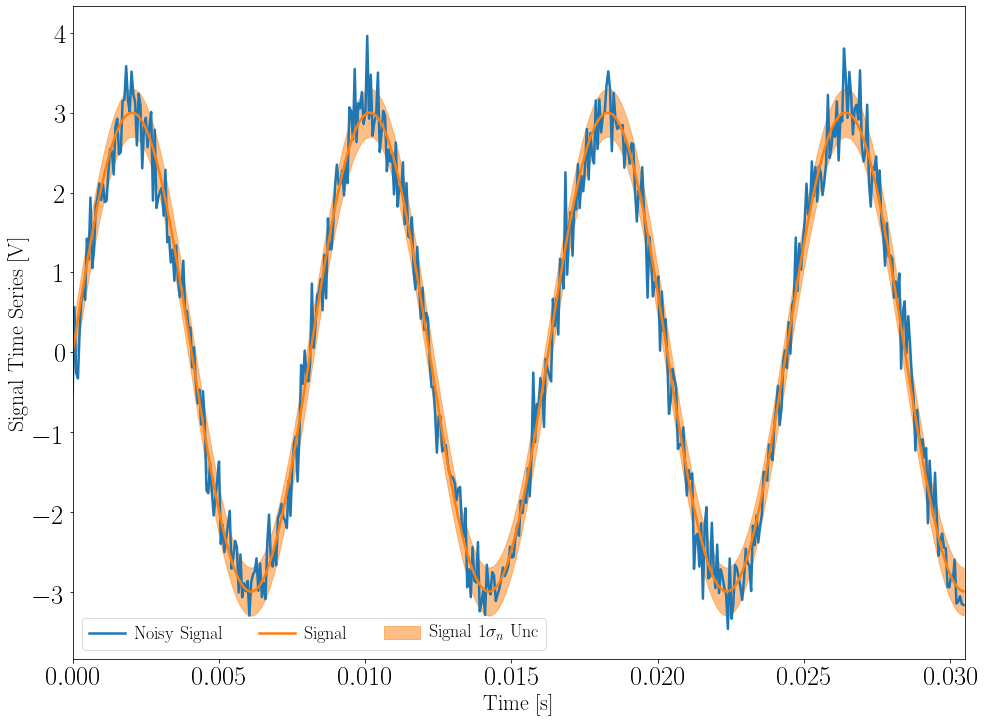

In [5]:
fig = plt.figure(figsize=(16,12))

low_index = 0
high_index = 500
plt.plot(tt[low_index:high_index], noisy_signal[low_index:high_index], label='Noisy Signal')
hh, = plt.plot(tt[low_index:high_index], signal[low_index:high_index], label='Signal')
plt.fill_between(tt[low_index:high_index], 
                 signal[low_index:high_index]-std_noise,
                 signal[low_index:high_index]+std_noise,
                 alpha=0.5,
                 color=hh.get_color(),
                 label='Signal $1 \sigma_n$ Unc')

plt.xlim([tt[low_index], tt[high_index]])
plt.xlabel('Time [s]')
plt.ylabel('Signal Time Series [$\mathrm{V}$]')

plt.legend(loc='lower left', ncol=3)

plt.show()

In [6]:
ff, Sxx = sig.welch(noisy_signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
print('Bin Width = {0} Hz'.format( ff[1] ))
print('Max PSD = {0} V^2/Hz'.format( max(Sxx) ))

Bin Width = 0.25 Hz
Max PSD = 11.986862798497727 V^2/Hz


In [7]:
signalIndicies = np.argwhere(Sxx > max(Sxx)*0.1)[:,0]
noiseIndicies = np.argwhere(Sxx <= max(Sxx)*0.1)[:,0]

print(signalIndicies)

Ps = np.sum(Sxx[signalIndicies] * binWidth)
Pn = np.sum(Sxx[noiseIndicies] * binWidth)
SNR = Ps/Pn

print('Signal Power = {0} V^2'.format(Ps))
print('Noise Power = {0} V^2'.format(Pn))
print('SNR = {0}'.format(SNR))
print
print('Calculated Signal Power = {}'.format(pow_sig))
print('Calculated Noise Power = {}'.format(pow_noise))
print('Calculated SNR= {}'.format(calc_SNR))
print
PSDnoiseVar = np.var(Sxx[noiseIndicies])
PSDnoiseStd = np.sqrt(PSDnoiseVar)
print('Sample Variance of the PSD noise floor = {0} (V^2/Hz)^2'.format(PSDnoiseVar))
print('Sample Std of the PSD noise floor = {0} V^2/Hz'.format(PSDnoiseStd))

[491 492 493]
Signal Power = 4.492563068678205 V^2
Noise Power = 0.09046410393981694 V^2
SNR = 49.661278595839214
Calculated Signal Power = 4.5
Calculated Noise Power = 0.09
Calculated SNR= 50.0
Sample Variance of the PSD noise floor = 1.225756564958184e-10 (V^2/Hz)^2
Sample Std of the PSD noise floor = 1.107138909513248e-05 V^2/Hz


-11.995640570914805
1.665982190965441


/anaconda3/envs/3gfn-paper-env/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


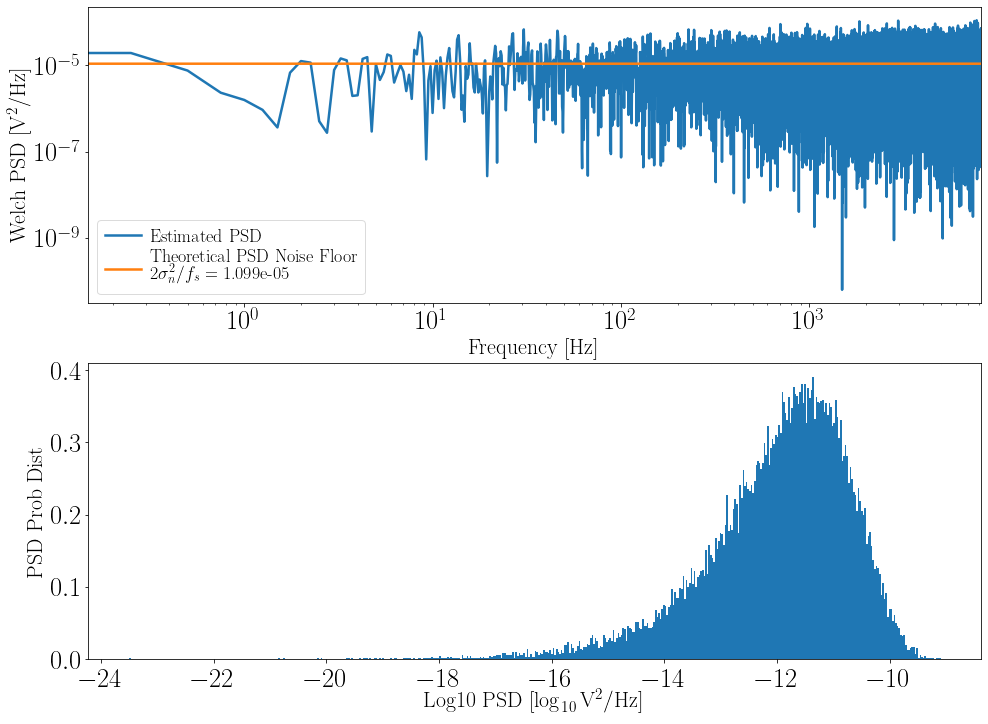

In [8]:
psd_est = psd_floor*np.ones(len(ff))
logSxx = np.log( Sxx[noiseIndicies] )
meanLogSxx = np.mean(logSxx)
varLogSxx = np.var(logSxx)
print(meanLogSxx)
print(varLogSxx)

fig = plt.figure(figsize=(16,12))
s1 = fig.add_subplot(211)
s2 = fig.add_subplot(212)

s1.loglog(ff[noiseIndicies], Sxx[noiseIndicies], label='Estimated PSD')
hh = s1.loglog(ff, psd_est, \
                  label='Theoretical PSD Noise Floor\n$ 2 \sigma^2_n/f_s$ = %.3e'%(psd_floor))
# s1.fill_between(ff, psd_est-np.sqrt(psd_var), psd_est+np.sqrt(psd_var),
#                  alpha=0.5,
#                  color=hh[0].get_color(),
#                  label='Theoretical PSD $1 \sigma_n$ Unc\n$(2 \sigma^2_n/f_s)^2$ = %.3e'%(np.sqrt(psd_var)))

s1.set_xlabel('Frequency [Hz]')
s1.set_ylabel('Welch PSD [$\mathrm{V}^2$/Hz]')
s1.set_xlim([ff[0], ff[-1]])

s1.legend()

s2.hist(logSxx, bins=500, density='norm')

s2.set_xlabel('Log10 PSD [$\log_{10}{\mathrm{V}^2/\mathrm{Hz}}$]')
s2.set_ylabel('PSD Prob Dist')

plt.show()

## Run many simulations for different numbers of averages with the same binwidth

In [9]:
from nds2utils.make_interactive_svg import make_interactive_svg

Naverages = 1.000000,  0.041013 seconds
Naverages = 2.000000,  0.049381 seconds
Naverages = 4.000000,  0.063299 seconds
Naverages = 8.000000,  0.077090 seconds
Naverages = 16.000000,  0.096615 seconds
Naverages = 32.000000,  0.131080 seconds


/anaconda3/envs/3gfn-paper-env/lib/python3.7/site-packages/ipykernel_launcher.py:55: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


Saving file as ./plots/PSD_multiple_averages.svg


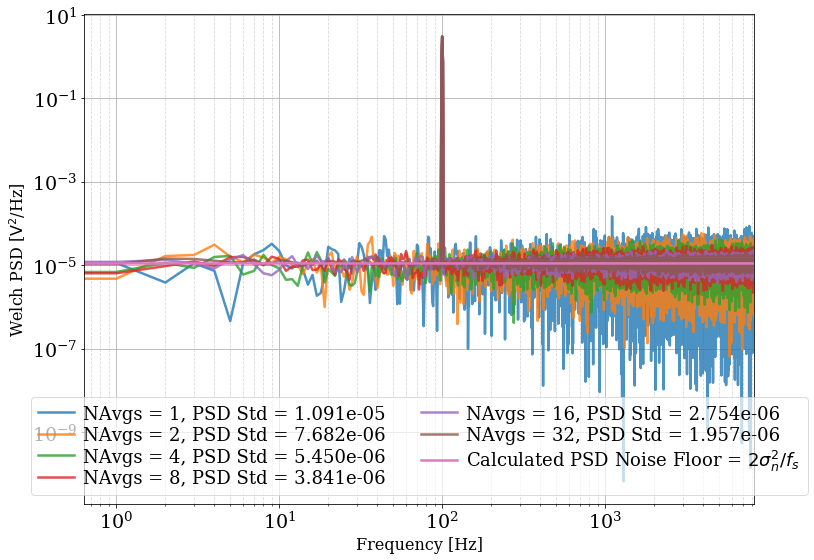

In [12]:
start_time = time.time()

fs = 2**14 # sampling frequency
dt = 1.0/fs # delta time

f_sig = 100 # signal frequency, Hertz
amp_sig = 3 # amplitude of the signal
pow_sig = amp_sig**2/2.0 # power in the signal, power = amp**2 / 2

amp_noise = 0.3 # amplitude of the noise, also should be the std
pow_noise = amp_noise**2 # power of the noise, should be variance 

calc_SNR = pow_sig/pow_noise

Naverages = 2.0**np.arange(6)
PSDStds = np.array([])
StdDict = {}
SxxDict = {}

fig, (s1) = plt.subplots(1)

for Naverage in Naverages:
    print('Naverages = %f,  %f seconds' % (Naverage, time.time() - start_time))
    T = 1.0 * Naverage # seconds total
    N = T * fs # total number of samples
    tt = np.arange(0,T,dt)

    averages = 1 # number of averages
    fftLen = T / Naverage # length in time of the fft
    nperseg = fftLen * fs # samples per segment
    noverlap = 0 # samples of overlap for windows
    binWidth = 1.0/fftLen

    signal = amp_sig * np.sin(2*np.pi*f_sig*tt)
    noise = amp_noise * np.random.randn(len(tt))

    noisy_signal = signal + noise
    
    ff, Sxx = sig.welch(noisy_signal, fs=fs, nperseg=nperseg, noverlap=noverlap)
    
    noiseIndicies = np.argwhere(Sxx <= max(Sxx)*0.1)[:,0]
    PSDnoiseVar = np.var(Sxx[noiseIndicies])
    PSDnoiseStd = np.sqrt(PSDnoiseVar)
    PSDStds = np.append(PSDStds, PSDnoiseStd)
    StdDict[Naverage] = PSDnoiseStd
    SxxDict[Naverage] = Sxx[noiseIndicies]
    
    s1.loglog(ff, Sxx, alpha=0.8,
              label='NAvgs = %d, PSD Std = %.3e'%(Naverage, PSDnoiseStd))
    
s1.loglog(ff, psd_floor*np.ones(len(ff)), 
          label='Calculated PSD Noise Floor = $ 2\sigma^2_n/f_s $')
s1.set_xlabel('Frequency [Hz]')
s1.set_ylabel('Welch PSD [$\mathrm{V}^2$/Hz]')
s1.set_xlim([ff[0], ff[-1]])

s1.legend(fontsize=18, ncol=2, loc='lower center')

s1.grid()
s1.grid(which='minor', ls='--', alpha=0.5)

plot_name = './plots/PSD_multiple_averages'
make_interactive_svg(fig, plot_name)

# plt.show()
# print('Done in %f seconds' % (time.time() - start_time))

In [ ]:
fig = plt.figure(figsize=(16,12))
s1 = fig.add_subplot(211)
s2 = fig.add_subplot(212)
for Naverage in Naverages:
    PSDnoiseStd = StdDict[Naverage]
    Sxx = SxxDict[Naverage]
    tempLogSxx = np.log(Sxx)
    print('Naverages = {0}'.format(Naverage))
    print('Calculated Variance = {0}'.format(1.0/Naverage))
    print('Actual Variance = {0}'.format( np.var(tempLogSxx) ) )
    print('Calc / Actual Var = {0}'.format( (1.0/Naverage) / np.var(tempLogSxx) ) )
    s1.hist(tempLogSxx, bins=500, alpha=0.7, density='norm', label='NAvgs = %d, PSD Std = %.3e'%(Naverage, PSDnoiseStd))
    s2.hist(tempLogSxx, bins=500, log=True, alpha=0.7, density='norm', label='NAvgs = %d, PSD Std = %.3e'%(Naverage, PSDnoiseStd))

s1.set_ylabel('PSD Prob Dist')
s2.set_xlabel('Log PSD [$\log{\mathrm{V}^2/\mathrm{Hz}}$]')
s2.set_ylabel('Log PSD Prob Dist')
s1.legend()

plt.show()

In [ ]:
PSDVars = PSDStds**2

In [ ]:
# Define a function for fitting an exponential slope in the log domain
def expFit(logx, beta, alpha):
    return beta + alpha * logx
def expFit2(logx, beta, alpha, gamma):
    return beta + alpha * logx + gamma * logx**2

In [ ]:
popt, pcov = opt.curve_fit(expFit, np.log(Naverages), np.log(PSDVars), p0=[psd_floor, -0.5])
beta0 = np.exp(popt[0])
alpha0 = popt[1]
slopeFitLabel = 'Slope Fit = %.3e $N^{%.3f}$'%(beta0, alpha0)

In [ ]:
fig = plt.figure(figsize=(16,12))
plt.loglog(Naverages, PSDVars, 'o', label='Measured PSD Variances')
plt.loglog(Naverages, psd_floor**2*np.ones(len(Naverages)), \
           label='Calculated PSD Noise Floor $ ( 2 \sigma^2_n/f_s )^2 $ = %.3e' % psd_floor**2)
plt.loglog(Naverages, np.exp(expFit(np.log(Naverages), *popt)), label=slopeFitLabel, zorder=2)
# plt.loglog(Naverages, np.exp(expFit2(np.log(Naverages), *popt2)), label='expFit2', zorder=2)

plt.title('PSD Noise Floor Variance vs Number of Averages')
plt.xlabel('N Averages')
plt.ylabel('PSD Noise Variance')
plt.grid(which='minor', ls='--')
plt.legend()

plt.show()

In [ ]:
NormedPSDStds = PSDStds/PSDStds[0]
NormedPSDVars = PSDVars/PSDVars[0]
print(NormedPSDVars)
print(1.0/NormedPSDVars)